#  RT-Dicomの読み込み・編集・保存

- **1. RTPlanの読み込み**
    - **1.1 pydicomモジュールのインポート**
    - **1.2 RTPlanのインポート**
    - **1.3 RTPlanの表示**
<br><br>
- **2 RTPlan編集の練習**
    - **2.1 Patient IDの取得**
    - **2.2 Manufacturerの取得（演習）**
    - **2.3 Study Descriptionの取得（演習）**
    - **2.4 Fraction Group Sequenceの取得**
    - **2.5 Number of Fractions Plannedの取得**
    - **2.6 1門目のBeam情報取得**
    - **2.7 Control point の取得**
    - **2.8 MLC位置情報の取得（演習）**
<br><br>
- **3 pythonの基本ルールとnumpyについて**
    - **3.1 データ型の確認（Leaf position）**
    - **3.2 for 文(繰り返し)**
    - **3.3 numpy(行列演算)**
<br><br>
- **4 RTPlan(3DCRT)の編集と保存**
    - **4.1 MLCの編集と保存**
    - **4.2 編集前後のBEV表示**
<br><br>
- **付録 RTPlan(VMAT)の編集と保存**
    - **5.1 if 文 (条件分岐) について**
    - **5.2 ifとfor 文の組み合わせ**
    - **5.3 VMATプランのインポートMLCの編集と保存 (VMAT)**
    - **5.4 MLCの編集と保存 (VMAT)編集前後のBEV表示**
    - **5.5 編集前後のBEV表示**

## ●1. RTPlanの読み込み

### 〇1.1 pydicomモジュールのインポート

In [12]:
import pydicom
print("O.K")

O.K


### 〇1.2 RTPlanのインポート

In [13]:
plan = pydicom.dcmread('3DCRT.dcm')
print("O.K")

O.K


### 〇1.3 RTPlanの表示

In [14]:
print(plan)

(0008, 0012) Instance Creation Date              DA: '20190615'
(0008, 0013) Instance Creation Time              TM: '135616.211000'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.5.635124024244.94376.20190607135536
(0008, 0020) Study Date                          DA: '20190615'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession Number                    SH: '9118078'
(0008, 0060) Modality                            CS: 'RTPLAN'
(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: 'aria'
(0008, 1030) Study Description                   LO: 'RT Head'
(0008, 103e) Series Description                  LO: 'ARIA RadOnc Plans'
(0008, 1070) Operators' Name                     PN: 'Matsuura Takaaki'
(0008, 1090) Manufacturer's Model Name         

## ●2. RTPlan編集の練習

### 〇2.1 Patient IDの取得

In [15]:
print(plan.PatientID)

11111111


### 〇2.2 Manufacturerの取得

In [16]:
print()

### 〇2.3 Study Descriptionの取得

In [ ]:
print()

### 〇2.4 Fraction Group Sequenceの表示

In [17]:
print(plan.FractionGroupSequence[0])

(300a, 0071) Fraction Group Number               IS: "1"
(300a, 0078) Number of Fractions Planned         IS: "10"
(300a, 0080) Number of Beams                     IS: "2"
(300a, 00a0) Number of Brachy Application Setups IS: "0"
(300c, 0004)  Referenced Beam Sequence   2 item(s) ---- 
   (300a, 0084) Beam Dose                           DS: "1.5"
   (300a, 0086) Beam Meterset                       DS: "179.882953893399"
   (300c, 0006) Referenced Beam Number              IS: "1"
   (3249, 0010) Private Creator                     LO: 'Varian Medical Systems VISION 3249'
   (3249, 1010) Private tag data                    UN: b'1.2.246.352.71.10.635124024244.48566.20190510165748\x00'
   ---------
   (300a, 0084) Beam Dose                           DS: "1.5"
   (300a, 0086) Beam Meterset                       DS: "180.255630310527"
   (300c, 0006) Referenced Beam Number              IS: "2"
   (3249, 0010) Private Creator                     LO: 'Varian Medical Systems VISION 3249'
   (32

### 〇2.5 Number of Fractions Planned の取得

In [18]:
print(plan.FractionGroupSequence[0].NumberOfFractionsPlanned)

10


### 〇2.6 1門目のBeam情報表示

In [20]:
print(plan.BeamSequence[0]) #1門目のビーム情報

(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 0080) Institution Name                    LO: 'HIPRAC'
(0008, 1040) Institutional Department Name       LO: 'Radiation'
(0008, 1090) Manufacturer's Model Name           LO: 'TDS'
(0018, 1000) Device Serial Number                LO: '2318'
(3002, 0050)  Primary Fluence Mode Sequence   1 item(s) ---- 
   (3002, 0051) Fluence Mode                        CS: 'STANDARD'
   ---------
(300a, 00b2) Treatment Machine Name              SH: 'TB2318'
(300a, 00b3) Primary Dosimeter Unit              CS: 'MU'
(300a, 00b4) Source-Axis Distance                DS: "1000"
(300a, 00b6)  Beam Limiting Device Sequence   3 item(s) ---- 
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMX'
   (300a, 00bc) Number of Leaf/Jaw Pairs            IS: "1"
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMY'
   (300a, 00bc) Number of Leaf/Jaw Pairs            IS: "1"
   ---------
   (300a, 00b8) RT

### 〇2.7 Control point の取得

In [21]:
cp0 = plan.BeamSequence[0].ControlPointSequence[0] # 最初のビームの、最初のコントロールポイント
print(cp0)

(300a, 0112) Control Point Index                 IS: "0"
(300a, 0114) Nominal Beam Energy                 DS: "6"
(300a, 0115) Dose Rate Set                       DS: "600"
(300a, 011a)  Beam Limiting Device Position Sequence   3 item(s) ---- 
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMX'
   (300a, 011c) Leaf/Jaw Positions                  DS: ['-98', '82']
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMY'
   (300a, 011c) Leaf/Jaw Positions                  DS: ['-81', '72']
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'MLCX'
   (300a, 011c) Leaf/Jaw Positions                  DS: ['-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '25', '1', '-3.8', '-6.25', '-8.4', '-10.6', '-40.2', '-50.4', '-54', '-54.72', '-69', '-77.15', '-81.05', '-84.15', '-85.55', '-86.96', '-86.05', '-84.95', '-83.48', '-81.35', '-78.2', '-72.2', '-67.2', '-6

### 〇2.8 MLC位置情報の取得

In [22]:
MLC = plan.BeamSequence[0].ControlPointSequence[0].BeamLimitingDevicePositionSequence[2].LeafJawPositions
# 最初のビームの、最初のControlpointの、3番目のBeamLimitingDevicePositionSequenceの、LeafJawPositions
print(MLC)

['-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '25', '1', '-3.8', '-6.25', '-8.4', '-10.6', '-40.2', '-50.4', '-54', '-54.72', '-69', '-77.15', '-81.05', '-84.15', '-85.55', '-86.96', '-86.05', '-84.95', '-83.48', '-81.35', '-78.2', '-72.2', '-67.2', '-61.6', '-55.2', '-47', '-34', '-19.55', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '33.6', '42.8', '49.8', '53.65', '55.95', '56.83', '58.28', '60.13', '65.45', '68.75', '71.4', '71.99', '71.91', '70.95', '69.15', '66.25', '64.13', '62.28', '60.68', '59.25', '56.47', '53.6', '50.85', '47.4', '42.8', '36.6', '27.8', '-3.75', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49', '-7.49

## ●3. pythonの基本ルールとNumpyについて

### 〇3.1 データの型を調べよう(leaf position)

In [23]:
MLC =  ['-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '25.3', '-4.0e-1', '-8.95', '-12.15', '-14.45', '-17.25', '-41', '-50.7', '-55.24', '-58.25', '-68.8', '-76.3', '-80.8', '-86.65', '-92.65', '-94.38', '-96.2', '-96.74', '-96.54', '-95', '-92.95', '-92.13', '-89.45', '-86.75', '-81.6', '-76.6', '-71.4', '-65.4', '-58.2', '-49.4', '-35.4', '-21.4', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '36.8', '46', '54.6', '59.75', '62.75', '65.85', '67.6', '67.51', '70.2', '74.95', '77.95', '80.65', '82.4', '82.36', '82.32', '81.8', '80.03', '78.15', '75.65', '73.67', '72.07', '69.85', '67.55', '65.2', '63.33', '60.75', '56.95', '53.2', '47.6', '40.4', '29.2', '-1.6', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17']
type(MLC)

list

### 〇3.2 for 文 (繰り返し) について

In [24]:
for i in range (10):
    print(i)

0
1
2
3
4
5
6
7
8
9


### 〇3.3 Numpy (行列演算) について

In [25]:
#Numpyを使わないで実行します
storages = [1,2,3,4,5,6,7,8,9]
new_storages = []

for i in storages:
    i += 1 
    new_storages.append(i)
print(new_storages)
    

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [26]:
#Numpyを使って実行します
import numpy as np
storages = np.array([1,2,3,4,5,6,7,8,9])
storages += 1
print(storages)
type(storages)

[ 2  3  4  5  6  7  8  9 10]


numpy.ndarray

## ●4. RTPlan(MLC)の編集と保存

### 〇4.1 MLCの編集と保存 (3DCRT)

In [27]:
import pydicom
import numpy as np

plan = pydicom.dcmread("3DCRT.dcm")

Beam = plan.FractionGroupSequence[0].NumberOfBeams
shift = 30

for i in range(Beam):
   
    leaf = plan.BeamSequence[i].ControlPointSequence[0].BeamLimitingDevicePositionSequence[2].LeafJawPositions
    leaf_mod = np.array(leaf)+shift
    plan.BeamSequence[i].ControlPointSequence[0].BeamLimitingDevicePositionSequence[2].LeafJawPositions = leaf_mod.tolist()
   
plan.save_as("3DCRT_MLCmod.dcm")  

print("O.K")

O.K


### 〇4.2 Beams eye viewの表示(参考)

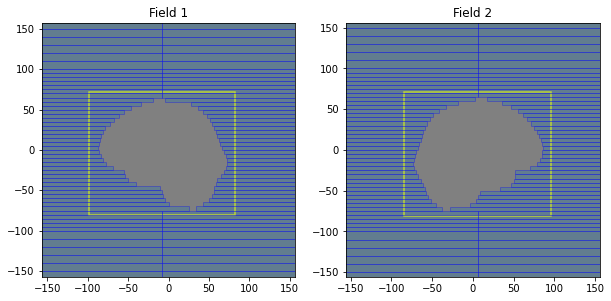

In [28]:
#編集前プランのBEV表示

import pydicom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plan = pydicom.dcmread('3DCRT.dcm')

def make_bev(beam, ax):

    num_of_leaves = beam.BeamLimitingDeviceSequence[2].NumberOfLeafJawPairs 

    cp0 = beam.ControlPointSequence[0] 

    jaw_x = cp0.BeamLimitingDevicePositionSequence[0].LeafJawPositions 
    jaw_y = cp0.BeamLimitingDevicePositionSequence[1].LeafJawPositions 
    leaf_position = cp0.BeamLimitingDevicePositionSequence[2].LeafJawPositions 

    boundaries = np.array(beam.BeamLimitingDeviceSequence[2].LeafPositionBoundaries) 
    leaf_widths = np.diff(boundaries)

    leaf_length = 200 

    angle = float(cp0.BeamLimitingDeviceAngle)
    angle_rad = np.radians(angle)
    a_sin = np.sin(angle_rad)
    a_cos = np.cos(angle_rad)
    
    x_0 = jaw_x[0]*a_cos - jaw_y[0]*a_sin
    y_0 = jaw_x[0]*a_sin + jaw_y[0]*a_cos
    ax.add_patch(plt.Rectangle(
        xy=(x_0, y_0),
        width=jaw_x[1]-jaw_x[0],
        height=jaw_y[1]-jaw_y[0],
        fill=False, ec='yellow', angle=angle, lw=1.5))
        
    for i in range(num_of_leaves):
        x_1 = (leaf_position[i]-leaf_length)*a_cos - boundaries[i]*a_sin
        y_1 = (leaf_position[i]-leaf_length)*a_sin + boundaries[i]*a_cos
        ax.add_patch(plt.Rectangle(
            xy=(x_1, y_1),
            width=leaf_length,
            height=leaf_widths[i],
            fill=True, ec='blue', angle=angle, lw=1., alpha=0.3))
                                       
        x_2 = leaf_position[i+num_of_leaves]*a_cos - boundaries[i]*a_sin
        y_2 = leaf_position[i+num_of_leaves]*a_sin + boundaries[i]*a_cos
        ax.add_patch(plt.Rectangle(
            xy=(x_2, y_2),
            width=leaf_length,
            height=leaf_widths[i],
            fill=True, ec='blue', angle=angle, lw=1., alpha=0.3))

    ax.patch.set_facecolor('gray')

    disp = max([np.sqrt(i**2 + j**2) for i in jaw_x for j in jaw_y])
    margin = 30
    disp += margin
    ax.set_xlim([-disp, disp])
    ax.set_ylim([-disp, disp])
    ax.set_aspect('equal')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) 
make_bev(plan.BeamSequence[0], ax1) 
ax1.set_title(plan.BeamSequence[0].BeamName) 
ax2 = fig.add_subplot(1,2,2) 
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

plt.savefig('3DCRT.jpg')

plt.show()


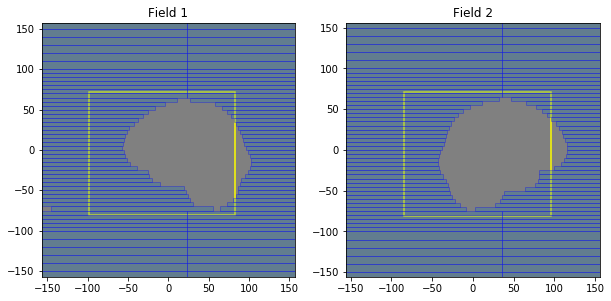

In [17]:
#編集後プランのBEV表示

plan = pydicom.dcmread('3DCRT_MLCmod.dcm')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) 
make_bev(plan.BeamSequence[0], ax1) 
ax1.set_title(plan.BeamSequence[0].BeamName) 
ax2 = fig.add_subplot(1,2,2) 
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

plt.savefig('3DCRT_MLCmod.jpg')

plt.show()

以下は付録です、余力のある方はどうぞ

### 〇5.1 if 文 (条件分岐) について

In [29]:
age = 26
if age >= 20:
    print("あなたは成人です")
else:
    print("あなたは未成年です")

あなたは成人です


### 〇5.2 ifとfor 文の組み合わせ

### 〇5.3 VMATプランのインポート

In [30]:
plan = pydicom.dcmread("VMAT.dcm")
print(plan)

(0008, 0012) Instance Creation Date              DA: '20171109'
(0008, 0013) Instance Creation Time              TM: '082436.793000'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.5.635124024244.51794.20171109082122
(0008, 0020) Study Date                          DA: '20080227'
(0008, 0030) Study Time                          TM: '152844'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'RTPLAN'
(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: 'aria'
(0008, 103e) Series Description                  LO: 'ARIA RadOnc Plans'
(0008, 1070) Operators' Name                     PN: 'Takaaki Matsuura'
(0008, 1090) Manufacturer's Model Name           LO: 'ARIA RadOnc'
(0010, 0010) Patient's Name                 

### 〇5.4 VMATプランのMLC編集

In [31]:
import pydicom
import numpy as np

plan = pydicom.dcmread("VMAT.dcm")
Beam = plan.FractionGroupSequence[0].NumberOfBeams
CP = plan.BeamSequence[0].NumberOfControlPoints
error = 30

for i in range(Beam):
    
    for j in range(CP):
        
        if plan.BeamSequence[i].ControlPointSequence[j].ControlPointIndex == 0:
            Beam_CP = plan.BeamSequence[i].ControlPointSequence[j].BeamLimitingDevicePositionSequence[2].LeafJawPositions
            leaf_mod = np.array(Beam_CP)+error
            plan.BeamSequence[i].ControlPointSequence[j].BeamLimitingDevicePositionSequence[2].LeafJawPositions = leaf_mod.tolist()

        else:
            Beam_CP = plan.BeamSequence[i].ControlPointSequence[j].BeamLimitingDevicePositionSequence[0].LeafJawPositions
            leaf_mod = np.array(Beam_CP)+error
            plan.BeamSequence[i].ControlPointSequence[j].BeamLimitingDevicePositionSequence[0].LeafJawPositions = leaf_mod.tolist()

plan.save_as("VMAT_MLCmod.dcm")
print("O.K")

O.K


### 〇5.5 VMATプランのBEV表示

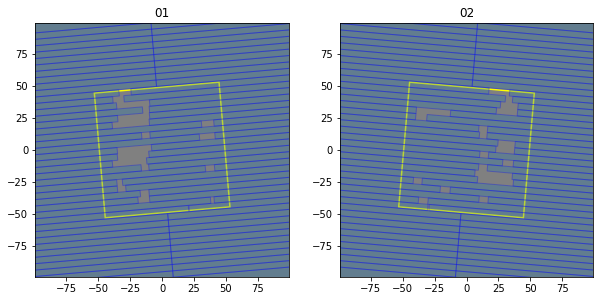

In [32]:
#MLC編集前のBEV表示
plan = pydicom.dcmread('VMAT.dcm')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) 
make_bev(plan.BeamSequence[0], ax1) 
ax1.set_title(plan.BeamSequence[0].BeamName) 
ax2 = fig.add_subplot(1,2,2) 
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

plt.savefig('VMAT.jpg')

plt.show()

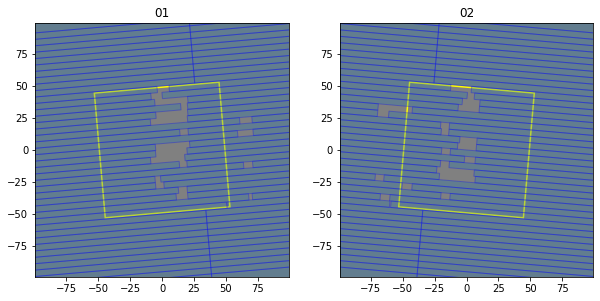

In [34]:
#MLC編集後のBEV表示
plan = pydicom.dcmread('VMAT_MLCmod.dcm')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) 
make_bev(plan.BeamSequence[0], ax1) 
ax1.set_title(plan.BeamSequence[0].BeamName) 
ax2 = fig.add_subplot(1,2,2) 
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

plt.savefig('VMAT_MLCmod.jpg')

plt.show()

In [36]:
%load_ext watermark

%watermark -v -m -p numpy,pydicom,matplotlib

print(" ")

%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.9
IPython 7.18.1

numpy 1.19.1
pydicom 1.2.2
matplotlib 3.3.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
CPU cores  : 16
interpreter: 64bit
 
last updated: Thu Sep 03 2020 15:12:45 ???? (?W???)
